# Project 8: Numerical Integration (e.g., Large Amplitude Pendulum)
## Abstract
In this lab, we were investigating the period of a pendulum, how the period of the pendulum varies with amplitude. We did this by using the energy principle, integrating a function, that is not integrable, numerically so that it's integral can be used as part of the analysis of a problem. We also applied curve fitting skills to get experimental values for period. We produced a plot of $T/T_0$ vs $\theta_{max}$ for: The small angle approximation (horizontal line), the Taylor series expansion (a quadratic), the exact integral (using simpson, or quad), the experimental data. We compared this together and found out that for smalla angles, the ratio was almost the exact value for all of them but as angles became larger, the ratio differed by a max of 2% when all other approximations were compared to the small angle approximation.
## Description
Any pendulum undergoes simple harmonic motion when the amplitude of oscillation is small. What happens for large amplitudes? The pendulum still oscillates, but the motion is no longer simple harmonic motion because the angular acceleration is not proportional to the negative of the angular displacement. An ideal simple pendulum consists of a particle of mass m suspended by a massless rigid rod of length L that is fixed at the upper end such that the particle moves in a vertical circle. This simple mechanical system oscillates with a symmetric restoring force (in the absence of dissipative forces) due to gravity. For small angle oscillations, the approximation $\sin \theta \approx \theta$ is valid. In this regime the pendulum oscillates with a period $T = 2 \pi \sqrt{\frac{L}{g}}$, a well-known textbook relation. This relation underestimates the exact period for any amplitude, but the difference is almost imperceptible for small angles. For larger angles T0 becomes more and more inaccurate for describing the exact period. An integral expression for the exact pendulum period may be derived from energy considerations, without a detailed discussion of differential equations. If we take the zero of potential energy at the lowest point of the trajectory. One can obtain a numerical solution from this method. We end up with an integral $$ T = 4 \sqrt {\frac{L}{g}} \int_0^{\pi/2} {d\theta \over {\sqrt{1 - k^2 \sin^2{\theta}}}}
$$

where $ k ≡ sin(θ_0/2)$. The definite integral is called the complete elliptic integral of the first kind.
## Algorithm and Discussion
First, we read the csv files of our experimental data, using slicng concepts, we collect the range of experimental data that is valid to use. We apply cruve fit methods and fit this data to a wave function model: $ Asin(\omega t + \phi) $ + offset. When doing this we give the compiler a hint of where to look at while fitting the data. From our fit we can obtain, Amplitude, angular frequency. The amplitude represents the angle we are dealing with. From the omega gotten from our fit, we can find period. Using the omega of the lowest amplitude as $ \omega_0 $ We can find the ratio: $T/T_0$ and plot this against $\theta_{max}$ for all experimental data values, Taylor series expansion of the integral, Simpson's rule approximation, and small angle approximation. We compare this approximations from the graph.
## Implementation and Code

In [43]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as pl 
import numpy as np
from scipy.integrate import quad
from scipy.optimize import curve_fit

In [44]:
df_alex = pd.read_csv('alex1.csv')
df_alex.head()

,time,angle
0,0.000,0.0
1,0.001,0.0
2,0.002,0.0
3,0.003,0.0
4,0.003,0.0


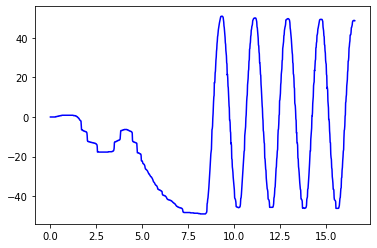

In [45]:
pl.plot(df_alex.time, df_alex.angle, 'b-')

A = 49.6569+/-0.0853 degrees, omega = 3.4957 +/- 0.0008 rad/sec


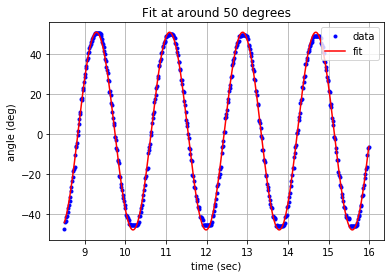

In [46]:
good_time = (df_alex.time > 8.5) & (df_alex.time < 16)
time = df_alex[good_time].time
angle = df_alex[good_time].angle
T0 = 2
A0 = 45

def model(t, A, omega, phi, off):
    return A*np.sin(omega*t + phi) + off

par, cov = curve_fit(model, time, angle, p0 = (A0, 2*np.pi/T0, 0, 0))

A, omega, phi, off = par
dA, dOm, dPhi, dOff = np.sqrt(np.diag(cov))

print("A = {0:3.4f}+/-{1:3.4f} degrees, omega = {2:3.4f} +/- {3:3.4f} rad/sec".format(A, dA, omega, dOm))

pl.plot(time, angle ,'b.', label='data')
pl.plot(time, model(time, A, omega, phi, off), 'r-', label="fit")
pl.grid()
pl.title("Fit at around 50 degrees")
pl.xlabel('time (sec)')
pl.ylabel('angle (deg)')
pl.legend()

In [47]:
df_dim = pd.read_csv('dimitris1.csv')
df_dim.head()

,time,angle
0,0.000,0.0
1,0.001,0.0
2,0.002,0.0
3,0.002,0.0
4,0.003,0.0


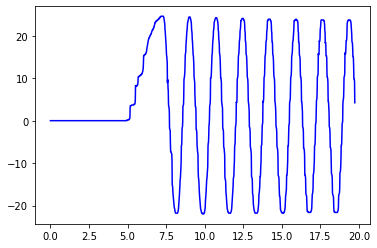

In [48]:
pl.plot(df_dim.time, df_dim.angle, 'b-')

A = 23.8094+/-0.0853 degrees, omega = 3.6396 +/- 0.0008 rad/sec


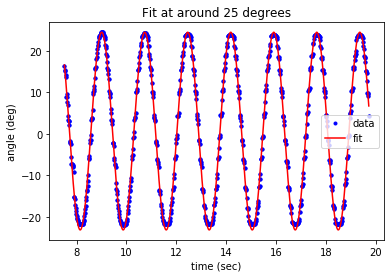

In [49]:
good_time1 = (df_dim.time > 7.5) & (df_dim.time < 20.0)
time1 = df_dim[good_time1].time
angle1 = df_dim[good_time1].angle
pl.plot(time1, angle1 ,'b.')
pl.grid()
T1 = 2
A1 = 23

def model1(t1, A1, omega1, phi1, off1):
    return A1*np.sin(omega1*t1 + phi1) + off1

par1, cov1 = curve_fit(model1, time1, angle1, p0 = (A1, 2*np.pi/T1, 0, 0))

A1, omega1, phi1, off1 = par1
dA1, dOm1, dPhi1, dOff1 = np.sqrt(np.diag(cov))

print("A = {0:3.4f}+/-{1:3.4f} degrees, omega = {2:3.4f} +/- {3:3.4f} rad/sec".format(A1, dA1, omega1, dOm1))

pl.plot(time1, angle1 ,'b.', label='data')
pl.plot(time1, model1(time1, A1, omega1, phi1, off1), 'r-', label="fit")
pl.grid()
pl.title("Fit at around 25 degrees")
pl.xlabel('time (sec)')
pl.ylabel('angle (deg)')
pl.legend()

In [50]:
df_dimit = pd.read_csv('dimitris2.csv')
df_dimit.head()

,time,angle
0,0.000,0.0
1,0.001,0.0
2,0.002,0.0
3,0.003,0.0
4,0.004,0.0


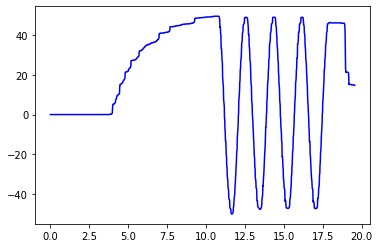

In [51]:
pl.plot(df_dimit.time, df_dimit.angle, 'b-')

A = 50.0725+/-0.0853 degrees, omega = 3.4925 +/- 0.0008 rad/sec


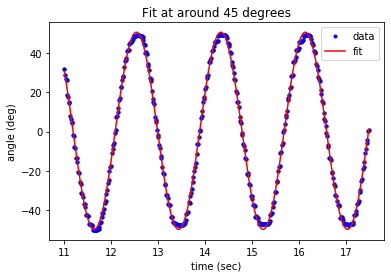

In [52]:
good_time2 = (df_dimit.time > 11.0) & (df_dimit.time < 17.5)
time2 = df_dimit[good_time2].time
angle2 = df_dimit[good_time2].angle
pl.plot(time2, angle2 ,'b.')
pl.grid()
T2 = 2
A2 = 45

def model2(t2, A2, omega2, phi2, off2):
    return A2*np.sin(omega2*t2 + phi2) + off2

par2, cov2 = curve_fit(model2, time2, angle2, p0 = (A2, 2*np.pi/T2, 0, 0))

A2, omega2, phi2, off2 = par2
dA2, dOm2, dPhi2, dOff2 = np.sqrt(np.diag(cov))

print("A = {0:3.4f}+/-{1:3.4f} degrees, omega = {2:3.4f} +/- {3:3.4f} rad/sec".format(A2, dA2, omega2, dOm2))

pl.plot(time2, angle2 ,'b.', label='data')
pl.plot(time2, model2(time2, A2, omega2, phi2, off2), 'r-', label="fit")
pl.grid()
pl.title("Fit at around 45 degrees")
pl.xlabel('time (sec)')
pl.ylabel('angle (deg)')
pl.legend()

In [53]:
df_sor = pd.read_csv('soren1.csv')
df_sor.head()

,time,angle
0,0.000,0.0
1,0.001,0.0
2,0.002,0.0
3,0.002,0.0
4,0.003,0.0


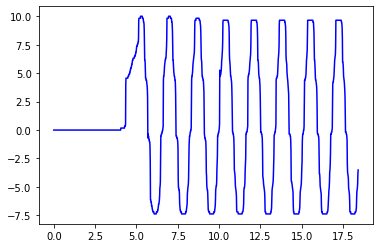

In [54]:
pl.plot(df_sor.time, df_sor.angle, 'b-')

A = 9.3050+/-0.0853 degrees, omega = 3.6767 +/- 0.0008 rad/sec


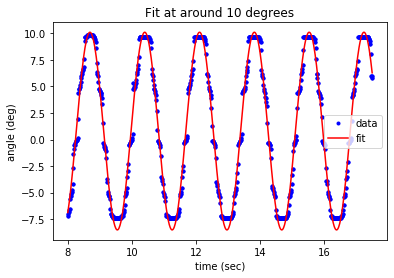

In [55]:
good_time3 = (df_sor.time > 8.0) & (df_sor.time < 17.5)
time3 = df_sor[good_time3].time
angle3 = df_sor[good_time3].angle
pl.plot(time3, angle3,'b.')
pl.grid()
T3 = 1.5
A3 = 10

def model3(t3, A3, omega3, phi3, off3):
    return A3*np.sin(omega3*t3 + phi3) + off3

par3, cov3 = curve_fit(model3, time3, angle3, p0 = (A3, 2*np.pi/T3, 0, 0))

A3, omega3, phi3, off3 = par3
dA3, dOm3, dPhi3, dOff3 = np.sqrt(np.diag(cov))

print("A = {0:3.4f}+/-{1:3.4f} degrees, omega = {2:3.4f} +/- {3:3.4f} rad/sec".format(A3, dA3, omega3, dOm3))

pl.plot(time3, angle3 ,'b.', label='data')
pl.plot(time3, model3(time3, A3, omega3, phi3, off3), 'r-', label="fit")
pl.grid()
pl.title("Fit at around 10 degrees")
pl.xlabel('time (sec)')
pl.ylabel('angle (deg)')
pl.legend()

In [56]:
df_sorr = pd.read_csv('soren2.csv')
df_sorr.head()

,time,angle
0,0.000,0.0
1,0.001,0.0
2,0.002,0.0
3,0.003,0.0
4,0.004,0.0


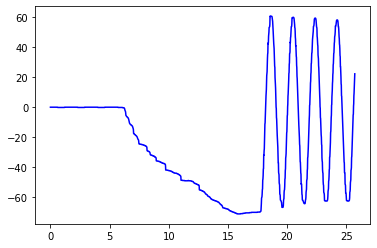

In [57]:
pl.plot(df_sorr.time, df_sorr.angle, 'b-')

A = 63.7811+/-0.0853 degrees, omega = 3.3837 +/- 0.0008 rad/sec


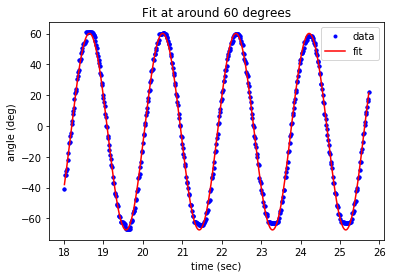

In [58]:
good_time4 = (df_sorr.time > 18.0) & (df_sorr.time < 26.0)
time4 = df_sorr[good_time4].time
angle4 = df_sorr[good_time4].angle
pl.plot(time4, angle4,'b.')
pl.grid()
T4 = 2
A4 = 60

def model4(t4, A4, omega4, phi4, off4):
    return A4*np.sin(omega4*t4 + phi4) + off4

par4, cov4 = curve_fit(model4, time4, angle4, p0 = (A4, 2*np.pi/T4, 0, 0))

A4, omega4, phi4, off4 = par4
dA4, dOm4, dPhi4, dOff4 = np.sqrt(np.diag(cov))

print("A = {0:3.4f}+/-{1:3.4f} degrees, omega = {2:3.4f} +/- {3:3.4f} rad/sec".format(A4, dA4, omega4, dOm4))

pl.plot(time4, angle4 ,'b.', label='data')
pl.plot(time4, model4(time4, A4, omega4, phi4, off4), 'r-', label="fit")
pl.grid()
pl.title("Fit at around 60 degrees")
pl.xlabel('time (sec)')
pl.ylabel('angle (deg)')
pl.legend()

In [59]:
df_stev = pd.read_csv('steve1.csv')
df_stev.head()

,time,angle
0,0.000,0.0
1,0.001,0.0
2,0.002,0.0
3,0.003,0.0
4,0.004,0.0


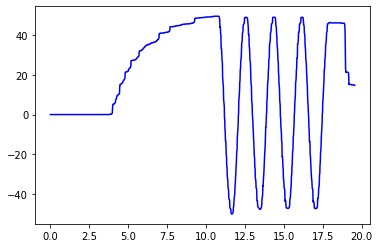

In [60]:
pl.plot(df_stev.time, df_stev.angle, 'b-')

A = 50.0725+/-0.0853 degrees, omega = 3.4925 +/- 0.0008 rad/sec


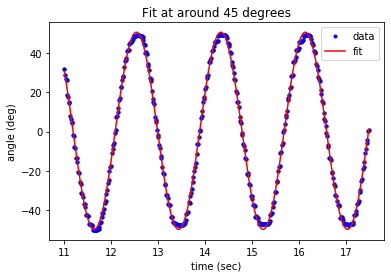

In [61]:
good_time5 = (df_stev.time > 11.0) & (df_stev.time < 17.5)
time5 = df_stev[good_time5].time
angle5 = df_stev[good_time5].angle
pl.plot(time5, angle5,'b.')
pl.grid()
T5 = 2
A5 = 45

def model5(t5, A5, omega5, phi5, off5):
    return A5*np.sin(omega5*t5 + phi5) + off5

par5, cov5 = curve_fit(model5, time5, angle5, p0 = (A5, 2*np.pi/T5, 0, 0))

A5, omega5, phi5, off5 = par5
dA5, dOm5, dPhi5, dOff5 = np.sqrt(np.diag(cov))

print("A = {0:3.4f}+/-{1:3.4f} degrees, omega = {2:3.4f} +/- {3:3.4f} rad/sec".format(A5, dA5, omega5, dOm5))

pl.plot(time5, angle5 ,'b.', label='data')
pl.plot(time5, model5(time5, A5, omega5, phi5, off5), 'r-', label="fit")
pl.grid()
pl.title("Fit at around 45 degrees")
pl.xlabel('time (sec)')
pl.ylabel('angle (deg)')
pl.legend()

In [62]:
df_mit = pd.read_csv('mitchell1.csv')
df_mit.head()

,time,angle
0,0.000,0.0
1,0.000,0.0
2,0.001,0.0
3,0.002,0.0
4,0.003,0.0


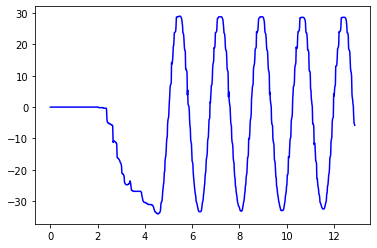

In [63]:
pl.plot(df_mit.time, df_mit.angle, 'b-')

A = 31.5824+/-0.0853 degrees, omega = 3.6094 +/- 0.0008 rad/sec


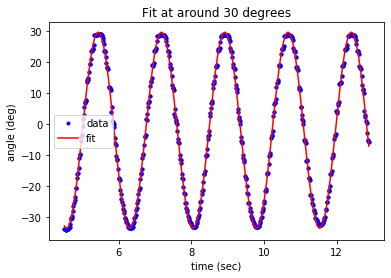

In [64]:
good_time6 = (df_mit.time > 4.5) & (df_mit.time < 13.0)
time6 = df_mit[good_time6].time
angle6 = df_mit[good_time6].angle
pl.plot(time6, angle6,'b.')
pl.grid()
T6 = 2
A6 = 30

def model6(t6, A6, omega6, phi6, off6):
    return A6*np.sin(omega6*t6 + phi6) + off6

par6, cov6 = curve_fit(model6, time6, angle6, p0 = (A6, 2*np.pi/T6, 0, 0))

A6, omega6, phi6, off6 = par6
dA6, dOm6, dPhi6, dOff6 = np.sqrt(np.diag(cov))

print("A = {0:3.4f}+/-{1:3.4f} degrees, omega = {2:3.4f} +/- {3:3.4f} rad/sec".format(A6, dA6, omega6, dOm6))

pl.plot(time6, angle6 ,'b.', label='data')
pl.plot(time6, model6(time6, A6, omega6, phi6, off6), 'r-', label="fit")
pl.grid()
pl.title("Fit at around 30 degrees")
pl.xlabel('time (sec)')
pl.ylabel('angle (deg)')
pl.legend()

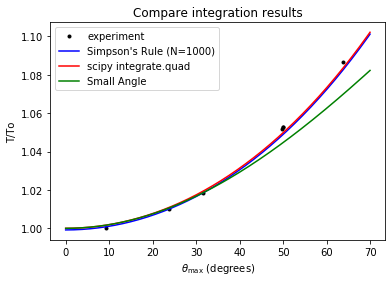

In [74]:
from scipy.integrate import quad  # import a numerical integrator
omega = [3.4957, 3.6396, 3.4925, 3.6767, 3.3837, 3.4925, 3.6094]
angle = [49.6569, 23.8094, 50.0725, 9.3050, 63.7811, 50.0725, 31.5824]
i=0
omega0 = 3.6767
T0 = 2*np.pi/omega0
ratio = []
while(i<7):
    omega[i] = 2*np.pi/omega[i]
    ratio.append(omega[i]/T0) 
    i = i+1
siList=[]  # scipy integrate.quad list
saList=[]  # small angle list
srList=[]  # Simpson's Rule, N=1000 list

thetArr = np.linspace(0.0, 70, 150) # range of theta values

for theta in thetArr:
    thetaRad=theta*np.pi/180.0
    m=np.sin(thetaRad/2.0)**2
    simpresult = K(m)
    quadResult = quad(K_int, 0, np.pi/2, args=(m,))
    smallAngle = (np.pi/2)*(1.0+m/4)
    srList.append(2*simpresult/np.pi)
    siList.append(2*quadResult[0]/np.pi)
    saList.append(2*smallAngle/np.pi)
    
pl.title("Compare integration results")
pl.xlabel("$\\theta_{\\rm max}$ (degrees)")
pl.ylabel("T/To")
pl.plot(angle, ratio,'k.', label="experiment")
pl.plot(thetArr, srList, 'b-', label="Simpson's Rule (N=1000)")
pl.plot(thetArr, siList, 'r-', label="scipy integrate.quad")
pl.plot(thetArr, saList, 'g-', label="Small Angle")
pl.legend(loc=2)

From the graph above, we can see that for small angles all integration results give similar ratio values, but as the angle increases, the small angle approximations deviates from the rest with a maximum difference  2% as seen on the graph

## Conclusion
In this lab, we were investigating the motion of a pendulum when it oscillates at larger amplitudes. We all know the small angle approximation works well in predicting the period of a pendulum when it rotates at a small amplitude, but what about when it rotates with a larger amplitude? We compared small angle approximations, simpson's rule approximation, and experimental data for small too large angles. We carried out this analysis by comparing the ratio, $T/T_0$, for each integration methods. We found out that, at the largest angle in the analysis, the difference between the approximations made by the small angle method and the other methods was not larger than 2%.